In [11]:
import pandas as pd
df=pd.read_csv('/Users/rishilboddula/Desktop/MLOPS/Sentiment-Analysis-MLOPS/archive (13)/training.1600000.processed.noemoticon.csv')
df.head()
df.tail()

,polarity of tweet�,id of the tweet,date of the tweet,query,user,text of the tweet�
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048571,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet�  1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet�  1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [13]:
df.drop(columns='id of the tweet',inplace=True)
df.drop(columns=['query','user'],inplace=True)
df.rename(columns={
    'polarity of tweet�': 'sentiment',
    'date of the tweet': 'date',
    'text of the tweet�': 'text'
},inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1048572 non-null  int64 
 1   date       1048572 non-null  object
 2   text       1048572 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df['sentiment']=df['sentiment'].replace({4:1})
'''
In the above line we are telling to replace all 4's with 1. For example if in a dataset there are positive,negativeand we want to replace with ones and 0s,
we can do like df['col_name']=df['col_nale'].replace({positive:1,negative:0})


'''



"\nIn the above line we are telling to replace all 4's with 1. For example if in a dataset there are positive,negativeand we want to replace with ones and 0s,\nwe can do like df['col_name']=df['col_nale'].replace({positive:1,negative:0})\n\n\n"

In [17]:
df['date']=pd.to_datetime(df['date'],errors='coerce')

/Users/rishilboddula/Desktop/MLOPS/Sentiment-Analysis-MLOPS/myenv/lib/python3.8/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [18]:
df['date'].head(10)

0   2009-04-06 22:19:49
1   2009-04-06 22:19:53
2   2009-04-06 22:19:57
3   2009-04-06 22:19:57
4   2009-04-06 22:20:00
5   2009-04-06 22:20:03
6   2009-04-06 22:20:03
7   2009-04-06 22:20:17
8   2009-04-06 22:20:19
9   2009-04-06 22:20:19
Name: date, dtype: datetime64[ns]

In [19]:
df_daily = df.groupby(df['date'].dt.date)['sentiment'].mean().reset_index()
df_daily.rename(columns={'date':'Date', 'sentiment':'Avg_Sentiment'}, inplace=True)

In [20]:
df_daily

,Date,Avg_Sentiment
0,2009-04-06,0.576281
1,2009-04-07,0.587026
2,2009-04-17,0.596628
3,2009-04-18,0.584444
4,2009-04-19,0.584004
5,2009-04-20,0.576544
6,2009-04-21,0.591941
7,2009-05-01,0.578279
8,2009-05-02,0.584530
9,2009-05-03,0.581722


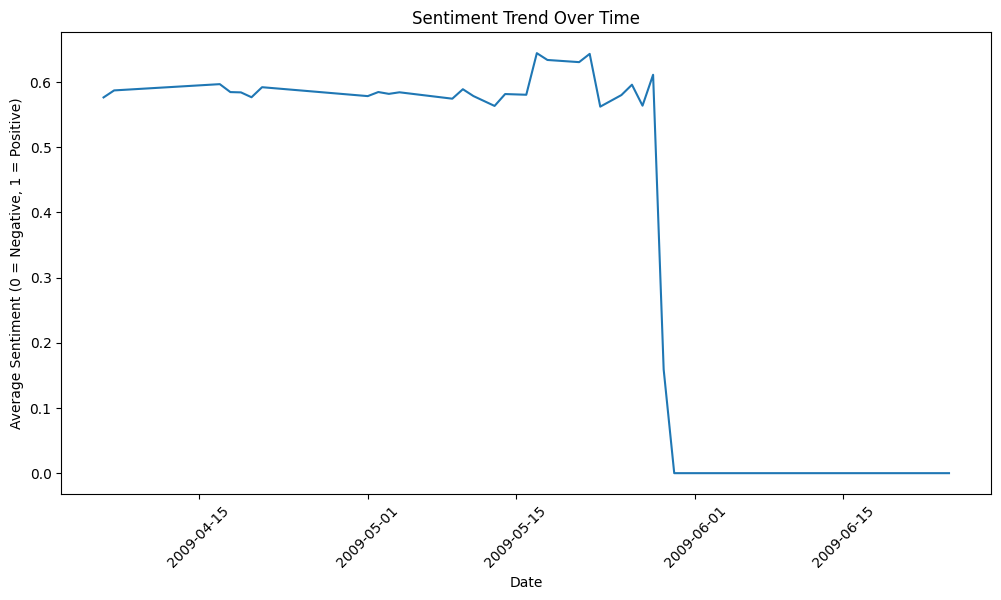

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Avg_Sentiment', data=df_daily)
plt.xlabel('Date')
plt.ylabel('Average Sentiment (0 = Negative, 1 = Positive)')
plt.title('Sentiment Trend Over Time')
plt.xticks(rotation=45)  # rotate dates to see them clearly
plt.show()